## Set Up the Environment

In [2]:
# pip install --upgrade pycaret scipy scikit-plot

In [3]:
# Import essential libraries for data manipulation and analysis
import pandas as pd
import numpy as np
import joblib

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split

# Specific settings to enhance visualization in Jupyter notebooks
pd.set_option('display.max_rows', 50)  # Limit the maximum number of visible rows to improve performance.
pd.set_option('display.max_columns', None)  # Show all available columns

# System settings and handling of custom modules
import sys
sys.path.append('..')

# Import custom modules for specific functionalities
from utils.utils import (
    load_data,
    clean_column_names
)

## Load the Data

In [5]:
df = load_data('../../data/dataset_run.csv')
print("Dimensions of the loaded DataFrame:", df.shape)

Data loaded with initial dimensions: (325, 77)
Dimensions of the loaded DataFrame: (325, 77)


In [6]:
df.head()

,edad,sexo,altura,peso,num calzado,articulacion,localizacion,lado,pace_run,velocidad_run,step rate_run,stride length_run,flight ratio_run,power_run,shock_run,impact gs_run,braking gs_run,footstrike type_run,pronation excursion_run,max pronation velocity_run,peak vertical grf_run,contact ratio_run,stride angle_run,leg spring stiffness_run,vertical spring stiffness_run,vertical grf rate_run,total force rate_run,step length_run,pronation excursion (mp->to)_run,stance excursion (fs->mp)_run,stance excursion (mp->to)_run,m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,pnca ap varo,pnca rp varo,pnca rp valgo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_i,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge,imc,zona afectada
0,36,0,173,65.0,40.0,rodilla,medial,b,2.748551,10,161.715795,2.039509,6.593809,176.417722,11.974009,10.824272,5.054195,7.822785,-13.776322,477.409271,2.289862,93.300849,0.186361,7.519020,21.803643,28.354237,88.931286,1.019748,-11.328530,15.311133,64.305786,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,3,3,0,3,0,3,0,0,0,0,0,1,3,0,0,0,0,-1,-1,0,0,0,0,0,0,0,3,0,1,21.72,rodilla_medial
1,35,1,181,78.0,44.0,sin afectacion,no especificado,no especificado,3.588932,13,172.110955,2.502031,30.331614,283.164706,15.401995,14.331714,5.501979,10.082353,-12.668764,686.949965,3.752896,69.573162,2.512311,11.643407,23.714214,40.468636,109.528792,1.251029,0.245774,9.668947,71.086960,3,0,3,3,0,0,0,0,0,0,3,1,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,7,0,0,0,0,0,3,0,0,0,3,23.81,sin afectacion_no especificado
2,41,1,184,90.0,43.0,pierna,posterior,b,2.771313,10,154.324844,2.156889,11.758673,265.053333,9.712691,8.177761,5.183445,6.293333,-14.814180,324.471029,2.529457,88.531048,0.601901,7.491232,17.637041,28.567287,84.667871,1.078440,0.896047,19.396257,71.162513,0,0,3,1,0,0,3,0,0,0,3,3,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,3,0,0,3,26.58,pierna_posterior
3,41,1,184,90.0,43.0,tobillo,lateral,b,2.771313,10,154.324844,2.156889,11.758673,265.053333,9.712691,8.177761,5.183445,6.293333,-14.814180,324.471029,2.529457,88.531048,0.601901,7.491232,17.637041,28.567287,84.667871,1.078440,0.896047,19.396257,71.162513,0,0,3,1,0,0,3,0,0,0,3,3,0,0,0,0,3,0,0,0,3,0,3,0,0,0,0,0,0,0,0,0,3,0,1,0,0,0,0,0,3,0,0,3,26.58,tobillo_lateral
4,34,1,188,77.0,43.0,rodilla,lateral,i,2.686467,10,162.078899,1.989980,9.644244,193.708861,8.147028,6.592865,4.734327,10.683544,-20.111363,505.933544,2.433391,90.249224,0.368234,8.277611,20.534927,29.369158,87.033638,0.994992,7.999814,8.112946,74.798466,3,3,3,0,0,1,0,0,0,0,3,0,0,3,0,0,3,0,3,0,3,0,1,0,0,0,0,0,0,0,0,0,5,5,0,0,0,1,0,3,0,0,0,3,21.79,rodilla_lateral


In [7]:
# Show column names before cleaning
print("Before cleaning:")
print(df.columns)

# Clean column names
df = clean_column_names(df)

#Show column names after cleaning
print("\nAfter cleaning:")
print(df.columns)

Before cleaning:
Index(['edad', 'sexo', 'altura', 'peso', 'num calzado', 'articulacion',
       'localizacion', 'lado', 'pace_run', 'velocidad_run', 'step rate_run',
       'stride length_run', 'flight ratio_run', 'power_run', 'shock_run',
       'impact gs_run', 'braking gs_run', 'footstrike type_run',
       'pronation excursion_run', 'max pronation velocity_run',
       'peak vertical grf_run', 'contact ratio_run', 'stride angle_run',
       'leg spring stiffness_run', 'vertical spring stiffness_run',
       'vertical grf rate_run', 'total force rate_run', 'step length_run',
       'pronation excursion (mp->to)_run', 'stance excursion (fs->mp)_run',
       'stance excursion (mp->to)_run', 'm1 hipermovil', 'thomas psoas',
       'thomas rf', 'thomas tfl', 'ober', 'arco aplanado', 'arco elevado',
       'm1 dfx', 'm5 hipermovil', 'arco transverso disminuido', 'm1 pfx',
       'arco transverso aumentado', 'hlf', 'hl', 'hr', 'hav', 'index minus',
       'tfi', 'tfe', 'tti', 'tte', 'ober

In [8]:
# List of Features to Remove (due to high correlation with others)
features_to_remove = ['stride length', 'flight ratio', 'fpi_total_i', 'peak vertical grf', 'leg spring stiffness', 'localizacion', 'lado']

# Remove Features from the DataFrame
df = df.drop(columns=features_to_remove)

In [9]:
print(f"Number of unique categories in 'articulation' before the transformation: {df['articulacion'].nunique()}")
print(f"Number of unique categories in 'affected area' before the transformation: {df['zona afectada'].nunique()}")

# Group Less Frequent Categories into a New Category Called 'other'
df['articulacion_group'] = df['articulacion'].replace(['cadera', 'espalda', 'sin afectacion', 'muslo'], 'otro')
print(f"Number of unique categories in 'joint' after the transformation: {df['articulacion_group'].nunique()}")

Number of unique categories in 'articulation' before the transformation: 8
Number of unique categories in 'affected area' before the transformation: 38
Number of unique categories in 'joint' after the transformation: 5


In [10]:
print(df['articulacion_group'].value_counts())

articulacion_group
rodilla    85
pie        70
otro       57
tobillo    57
pierna     56
Name: count, dtype: int64


In [11]:
# Remove More Features from the DataFrame
features_to_remove = ['articulacion', 'zona afectada']
df = df.drop(columns=features_to_remove)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   edad                          325 non-null    int64  
 1   sexo                          325 non-null    int64  
 2   altura                        325 non-null    int64  
 3   peso                          325 non-null    float64
 4   num calzado                   325 non-null    float64
 5   pace                          325 non-null    float64
 6   velocidad                     325 non-null    int64  
 7   step rate                     325 non-null    float64
 8   power                         325 non-null    float64
 9   shock                         325 non-null    float64
 10  impact gs                     325 non-null    float64
 11  braking gs                    325 non-null    float64
 12  footstrike type               325 non-null    float64
 13  prona

## Train-Test Split

In [13]:
df_rodilla = df[df['articulacion_group'] == 'rodilla']
df_no_rodilla = df[df['articulacion_group'] != 'rodilla'].sample(n=85, random_state=42)

# Combine the two DataFrames
df_balanced = pd.concat([df_rodilla, df_no_rodilla])

# Create the binary target variable
df_balanced['target'] = df_balanced['articulacion_group'].apply(lambda x: 1 if x == 'rodilla' else 0)
class_names = ['no rodilla', 'rodilla']

# Remove unused target variables from the feature set
X = df_balanced.drop(columns=['articulacion_group','target'], axis=1)
y = df_balanced['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Show the dimensions of the training and test sets to verify
print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test:", X_test.shape, "y_test:", y_test.shape)

X_train: (136, 68) y_train: (136,)
X_test: (34, 68) y_test: (34,)


In [14]:
# Save the datasets
joblib.dump(X_train, '../../data/X_train.pkl')
joblib.dump(X_test, '../../data/X_test.pkl')
joblib.dump(y_train, '../../data/y_train.pkl')
joblib.dump(y_test, '../../data/y_test.pkl')

print("Datasets saved successfully.")

Datasets saved successfully.


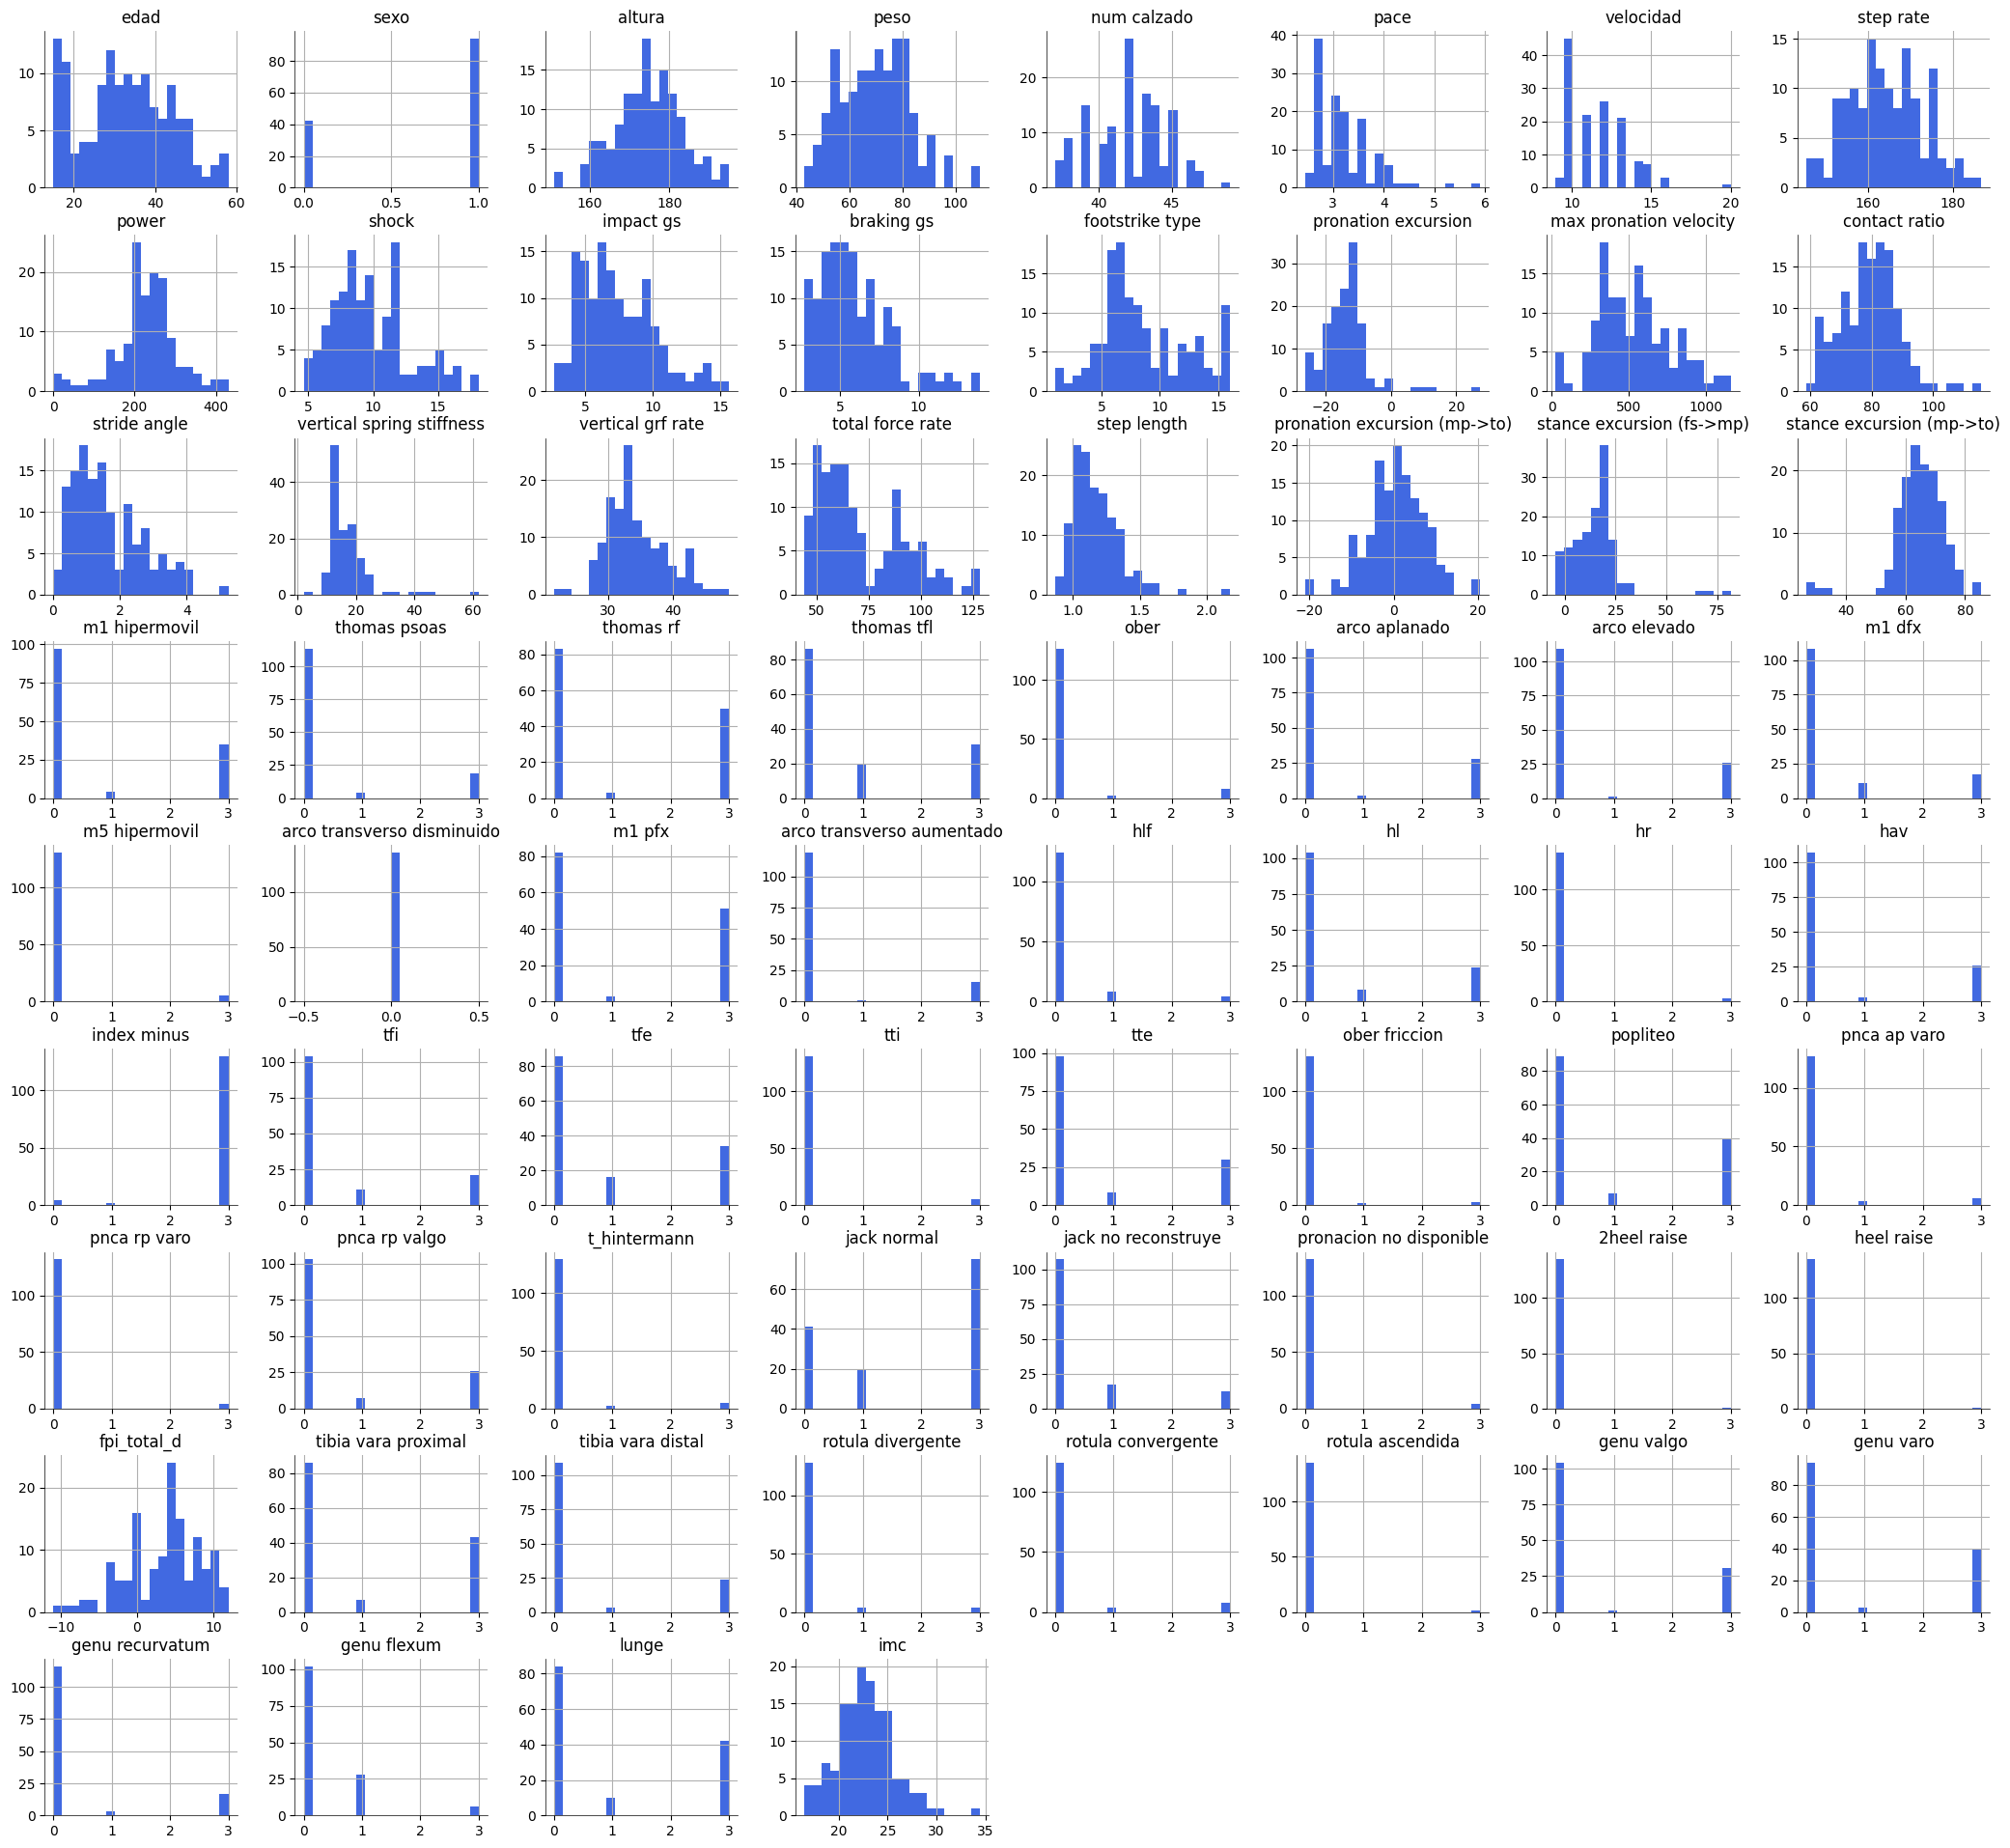

In [15]:
# Histogram of the training set
for ax in X_train.hist(bins=20, figsize=(26, 24), color='royalblue'):
    for a in ax.flatten():
        a.spines['top'].set_visible(False)
        a.spines['right'].set_visible(False)
        a.spines['left'].set_linewidth(0.5)
        a.spines['bottom'].set_linewidth(0.5)

plt.show()

In [16]:
# Descriptive statistics of the training set
display(X_train.describe().round(3))

,edad,sexo,altura,peso,num calzado,pace,velocidad,step rate,power,shock,impact gs,braking gs,footstrike type,pronation excursion,max pronation velocity,contact ratio,stride angle,vertical spring stiffness,vertical grf rate,total force rate,step length,pronation excursion (mp->to),stance excursion (fs->mp),stance excursion (mp->to),m1 hipermovil,thomas psoas,thomas rf,thomas tfl,ober,arco aplanado,arco elevado,m1 dfx,m5 hipermovil,arco transverso disminuido,m1 pfx,arco transverso aumentado,hlf,hl,hr,hav,index minus,tfi,tfe,tti,tte,ober friccion,popliteo,pnca ap varo,pnca rp varo,pnca rp valgo,t_hintermann,jack normal,jack no reconstruye,pronacion no disponible,2heel raise,heel raise,fpi_total_d,tibia vara proximal,tibia vara distal,rotula divergente,rotula convergente,rotula ascendida,genu valgo,genu varo,genu recurvatum,genu flexum,lunge,imc
count,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.0,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000,136.000
mean,33.015,0.691,174.478,69.713,42.074,3.226,11.684,164.099,226.681,9.806,7.421,5.919,8.581,-13.574,532.716,79.543,1.660,16.858,34.343,71.532,1.178,0.598,14.964,64.736,0.801,0.449,1.125,0.824,0.191,0.632,0.581,0.456,0.110,0.0,1.147,0.360,0.147,0.588,0.066,0.596,2.882,0.544,0.868,0.110,0.721,0.081,0.934,0.154,0.088,0.625,0.125,1.801,0.390,0.088,0.022,0.022,3.588,1.000,0.551,0.118,0.206,0.022,0.691,0.882,0.397,0.338,1.000,22.743
std,10.962,0.464,8.562,12.983,2.547,0.542,1.812,8.679,76.645,2.914,2.698,2.277,3.666,7.173,239.946,9.638,1.057,7.140,4.549,20.646,0.185,6.961,12.050,8.716,1.310,1.046,1.442,1.235,0.715,1.216,1.184,1.003,0.567,0.0,1.448,0.971,0.551,1.145,0.442,1.182,0.559,1.088,1.275,0.567,1.239,0.456,1.356,0.631,0.509,1.180,0.577,1.371,0.879,0.509,0.257,0.257,4.741,1.382,1.147,0.531,0.721,0.257,1.262,1.356,0.998,0.702,1.366,2.931
min,15.000,0.000,151.000,43.000,37.000,2.452,9.000,145.378,0.000,4.638,2.695,2.730,1.000,-26.243,26.152,58.636,0.016,2.084,21.726,44.106,0.866,-21.030,-4.482,26.714,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-11.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,16.490
25%,25.000,0.000,169.000,59.750,40.000,2.769,10.000,157.634,194.526,7.653,5.170,4.343,6.158,-17.983,351.719,72.468,0.847,12.742,31.166,55.062,1.052,-3.311,6.490,60.263,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,20.865
50%,33.000,1.000,175.000,70.000,42.000,3.040,11.000,163.358,231.001,9.382,7.105,5.459,7.544,-13.569,512.772,80.119,1.447,14.597,33.500,64.468,1.133,0.507,15.958,65.407,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,4.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,22.620
75%,41.000,1.000,180.000,78.000,44.000,3.556,13.000,169.941,266.529,11.695,9.187,7.005,11.498,-11.119,673.683,85.219,2.345,19.074,36.852,87.082,1.266,5.255,19.700,69.616,3.000,0.000,3.000,1.000,0.000,0.000,0.000,0.000,0.000,0.0,3.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,1.500,0.000,1.000,0.000,3.000,0.000,0.000,0.000,0.000,3.000,0.000,0.000,0.000,0.000,7.000,3.000,0.000,0.000,0.000,0.000,0.000,3.000,0.000,0.250,3.000,24.540
max,58.000,1.000,195.000

## Correlation between variables

In [18]:
X_train_with_target = X_train.copy()
X_train_with_target['Target'] = y_train
corr_matrix = X_train_with_target.corr()

threshold = 0.5 # Correlation threshold

# Find pairs with correlation above the threshold
strong_pairs = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
strong_pairs = strong_pairs.stack().reset_index()
strong_pairs.columns = ['variable1', 'variable2', 'correlation']

strong_pairs = strong_pairs[strong_pairs['correlation'] > threshold]  # Filter pairs with strong correlation.
strong_pairs = strong_pairs.sort_values('correlation', ascending=False) # Sort by correlation
strong_pairs

,variable1,variable2,correlation
2173,2heel raise,heel raise,1.000000
339,pace,step length,0.946542
325,pace,velocidad,0.895148
260,peso,imc,0.874890
134,altura,num calzado,0.837741
400,velocidad,step length,0.813111
567,shock,impact gs,0.804597
198,peso,num calzado,0.788302
69,sexo,num calzado,0.781624
568,shock,braking gs,0.765719
